Dataset Dimensions: (301, 9)
                     Car_Name  Year  Selling_Price  Present_Price  Driven_kms  \
255                      brio  2012           3.00           5.35       53675   
160  Bajaj Avenger Street 220  2011           0.45           0.95       24000   
59                   fortuner  2014          19.99          35.96       41000   
170              Yamaha FZ S   2012           0.40           0.83        5500   
295                      city  2015           8.55          13.09       60076   

    Fuel_Type Selling_type Transmission  Owner  
255    Petrol       Dealer       Manual      0  
160    Petrol   Individual       Manual      0  
59     Diesel       Dealer    Automatic      0  
170    Petrol   Individual       Manual      0  
295    Diesel       Dealer       Manual      0  

📊 Linear Regression
RMSE : 1.94
R²   : 0.607

📊 Random Forest
RMSE : 1.40
R²   : 0.795


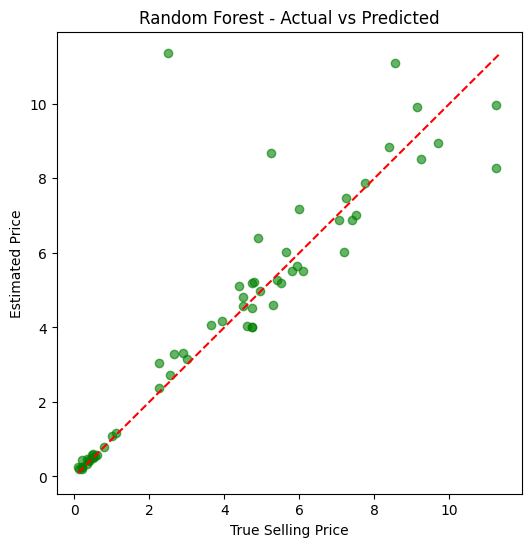

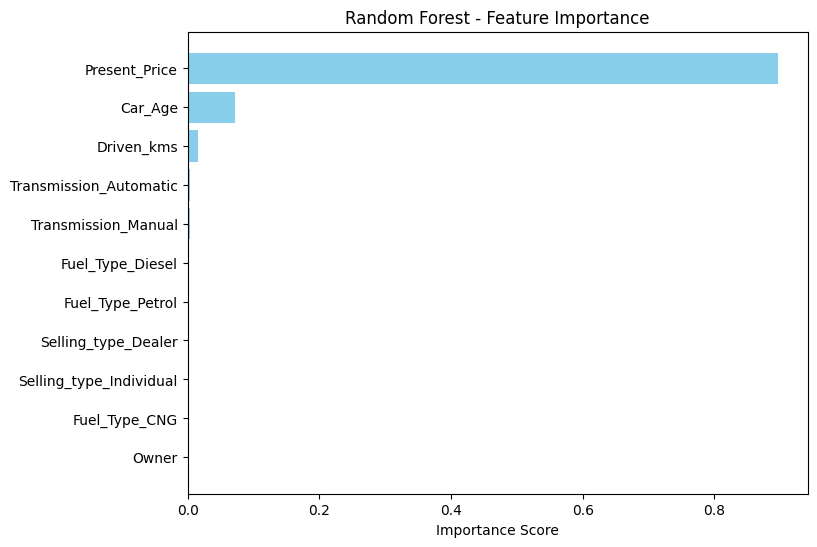

In [5]:
"""
Car Resale Price Estimator
Dataset: car data.csv
"""

# 📌 Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 📌 Step 2: Load dataset
# Update the file path to a relative path accessible in Colab
FILE_PATH = "car data.csv"
cars = pd.read_csv(FILE_PATH)

# Preview data
print("Dataset Dimensions:", cars.shape)
print(cars.sample(5))   # random 5 rows

# 📌 Step 3: Feature engineering
cars["Car_Age"] = 2025 - cars["Year"]
cars.drop(columns=["Year", "Car_Name"], inplace=True)

# Define input features and target
features = cars.drop("Selling_Price", axis=1)
target = cars["Selling_Price"]

# 📌 Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=101
)

# 📌 Step 5: Identify column types
cat_cols = ["Fuel_Type", "Selling_type", "Transmission"]
num_cols = [col for col in features.columns if col not in cat_cols]

# 📌 Step 6: Preprocessing pipeline
transformer = ColumnTransformer([
    ("num_scaling", StandardScaler(), num_cols),
    ("cat_encoding", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

# 📌 Step 7: Build models
linear_pipe = Pipeline([
    ("prep", transformer),
    ("lr", LinearRegression())
])

forest_pipe = Pipeline([
    ("prep", transformer),
    ("rf", RandomForestRegressor(n_estimators=250, random_state=101))
])

# 📌 Step 8: Train models
linear_pipe.fit(X_train, y_train)
forest_pipe.fit(X_train, y_train)

# 📌 Step 9: Make predictions
pred_lin = linear_pipe.predict(X_test)
pred_rf = forest_pipe.predict(X_test)

# 📌 Step 10: Evaluation function
def model_report(y_real, y_est, title):
    rmse_val = np.sqrt(mean_squared_error(y_real, y_est))
    r2_val = r2_score(y_real, y_est)
    print(f"\n📊 {title}")
    print(f"RMSE : {rmse_val:.2f}")
    print(f"R²   : {r2_val:.3f}")

model_report(y_test, pred_lin, "Linear Regression")
model_report(y_test, pred_rf, "Random Forest")

# 📌 Step 11: Plot - Actual vs Predicted for Random Forest
# 📊 Chart 1: Actual vs Predicted (Random Forest)
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred_rf, c="green", alpha=0.6)

_min = min(y_test.min(), pred_rf.min())
_max = max(y_test.max(), pred_rf.max())

plt.plot([_min, _max], [_min, _max], "r--")
plt.xlabel("True Selling Price")
plt.ylabel("Estimated Price")
plt.title("Random Forest - Actual vs Predicted")
plt.show()


# 📊 Chart 2: Feature Importance (Random Forest)
importances = forest_pipe.named_steps["rf"].feature_importances_
feature_names = (num_cols +
                 list(forest_pipe.named_steps["prep"].transformers_[1][1].get_feature_names_out(cat_cols)))

feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values("Importance", ascending=True)

plt.figure(figsize=(8,6))
plt.barh(feat_imp["Feature"], feat_imp["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.title("Random Forest - Feature Importance")
plt.show()